# Cleaning and analysis of German company data from Kaggle

## 1.Introduction
- This project demonstrates the application of skills in cleaning, preparing, analyzing and visualizing data using Python and its libraries
- The data source is the website https://www.kaggle.com/
- Purpose: cleaning and preparation of csv file reading data using the pandas library, performing analysis and visualization using the numpy, matplotlib, seaborn, sklearn libraries

## 2. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## 3. Downloading data

In [2]:
path = 'Top_12_German_Companies_Financial_Data.csv'
df = pd.read_csv(path)

## 4.Data cleaning

In [3]:
#check list of general data
#1. Size of data
print('Shape: ', df.shape)

Shape:  (384, 10)


In [4]:
#2. Names of columns
print('Columns: ', df.columns.tolist())

Columns:  ['Company', 'Period', 'Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity']


In [5]:
#3. Let's see first 10 rows
print(df.head(10))

         Company      Period      Revenue    Net Income  Liabilities  \
0  Volkswagen AG   3/31/2017  19695988685  1.329398e+09  24520605687   
1  Volkswagen AG   6/30/2017   7201825633  7.220810e+08  27556950386   
2  Volkswagen AG   9/30/2017  15706422457  2.263166e+09  11556351337   
3  Volkswagen AG  12/31/2017   9750496618  5.168898e+08  21354201295   
4  Volkswagen AG   3/31/2018  15989256775  1.291419e+09  42659096630   
5  Volkswagen AG   6/30/2018   6601886883  6.740154e+08  48397997453   
6  Volkswagen AG   9/30/2018  11494666314  1.658196e+09  14924498356   
7  Volkswagen AG  12/31/2018  15132692627  1.296424e+09  22603216585   
8  Volkswagen AG   3/31/2019  14907937768  1.438598e+09  20854112480   
9  Volkswagen AG   6/30/2019   8797334817  1.311085e+09  25365853191   

        Assets       Equity   ROA (%)    ROE (%)  Debt to Equity  
0  58120450678  33599844991  2.287315   3.956559        0.729783  
1  53860356064  26303405678  1.340654   2.745200        1.047657  
2  260

In [6]:
#4. And data types
print('\nData types: ')
print(df.dtypes)


Data types: 
Company            object
Period             object
Revenue             int64
Net Income        float64
Liabilities         int64
Assets              int64
Equity              int64
ROA (%)           float64
ROE (%)           float64
Debt to Equity    float64
dtype: object


In [7]:
#5. Final lets prepare for cleaning , let's see a number of missing values
print('\nMissing values per column: ')
print(df.isnull().sum())


Missing values per column: 
Company           0
Period            0
Revenue           0
Net Income        0
Liabilities       0
Assets            0
Equity            0
ROA (%)           0
ROE (%)           0
Debt to Equity    0
dtype: int64


In [8]:
print('How much duplicated in DataFrame: ',df.duplicated().sum())
print('\nMissing values in DataFrame:\n ',df.isnull().sum())

How much duplicated in DataFrame:  0

Missing values in DataFrame:
  Company           0
Period            0
Revenue           0
Net Income        0
Liabilities       0
Assets            0
Equity            0
ROA (%)           0
ROE (%)           0
Debt to Equity    0
dtype: int64


In [9]:
#lets see Names of 12 Companies:
print('\nCompanies: ', df['Company'].unique())


Companies:  ['Volkswagen AG' 'Siemens AG' 'Allianz SE' 'BMW AG' 'BASF SE'
 'Deutsche Telekom AG' 'Daimler AG' 'SAP SE' 'Bayer AG' 'Deutsche Bank AG'
 'Porsche AG' 'Merck KGaA']


At this stage, we see that data cleaning is not necessary because there are no missing values ​​or duplicates, all columns have information and the corresponding type, in which the information columns are of type int64 or float64

## 5.Basic Analyse and visualisation

In [10]:
print('-------Basic Statistic------')
print(df.describe())

-------Basic Statistic------
            Revenue    Net Income   Liabilities        Assets        Equity  \
count  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02  3.840000e+02   
mean   1.270992e+10  1.249025e+09  3.115579e+10  6.141624e+10  3.026045e+10   
std    4.095183e+09  5.445441e+08  1.139538e+10  1.698922e+10  1.172803e+10   
min    5.149850e+09  2.980309e+08  1.004637e+10  2.177324e+10  1.001762e+10   
25%    9.315161e+09  8.643813e+08  2.085174e+10  5.074013e+10  1.966813e+10   
50%    1.266963e+10  1.145476e+09  3.230659e+10  6.020715e+10  2.999063e+10   
75%    1.621724e+10  1.560234e+09  4.088942e+10  7.369075e+10  3.984646e+10   
max    1.990964e+10  2.884007e+09  4.976940e+10  9.657402e+10  4.991812e+10   

          ROA (%)     ROE (%)  Debt to Equity  
count  384.000000  384.000000      384.000000  
mean     2.260345    4.992758        1.235580  
std      1.406047    3.401370        0.781592  
min      0.501102    0.980480        0.219663  
25%      1.310458  

First of all lets see Leaders in Revenue values

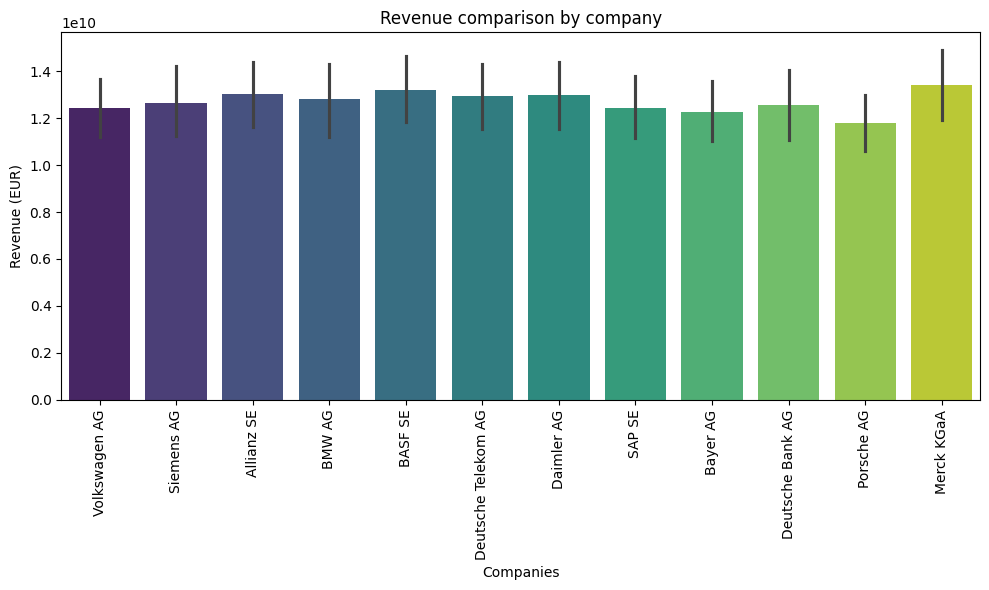

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data = df ,x='Company', y = 'Revenue', hue = 'Company', palette = 'viridis')
plt.title('Revenue comparison by company')
plt.xlabel('Companies')
plt.ylabel('Revenue (EUR)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now lets analyse Profit comparison by companies

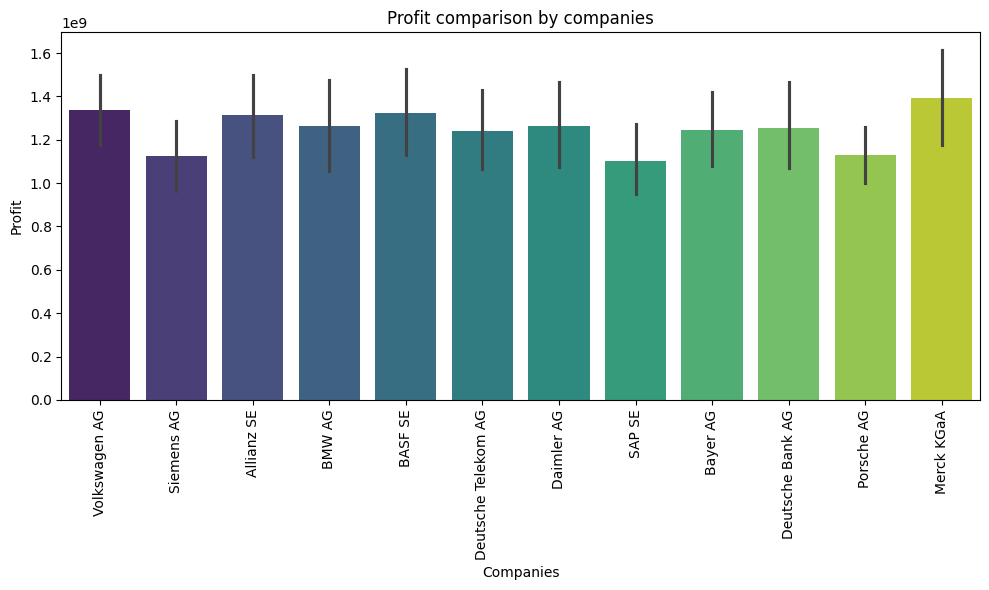

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Company', y = 'Net Income', hue = 'Company', palette='viridis')
plt.title('Profit comparison by companies')
plt.xlabel('Companies')
plt.ylabel('Profit')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Now lets analyse Liabilities comparison by companies

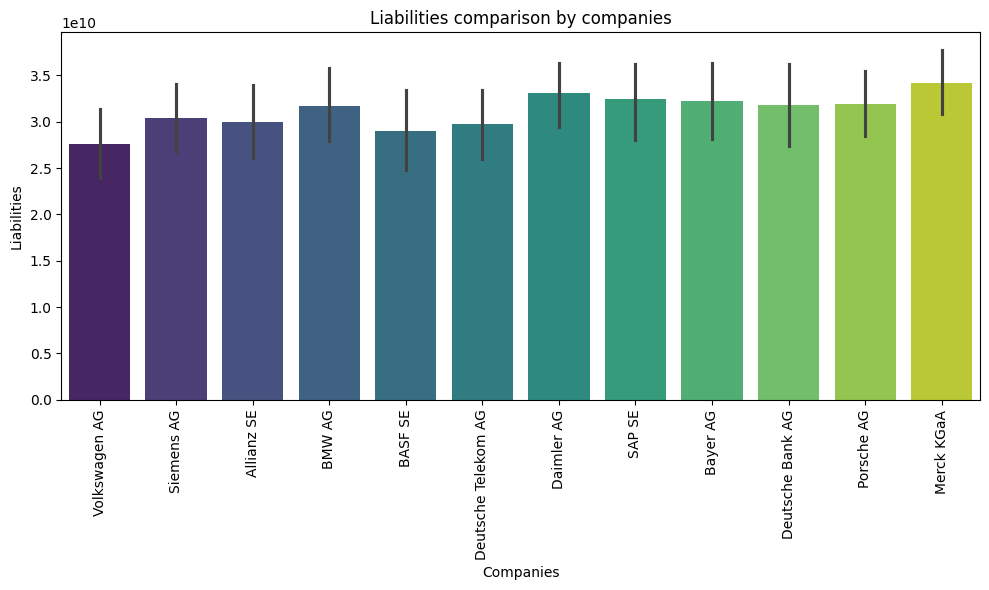

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Company', y = 'Liabilities', hue = 'Company', palette='viridis')
plt.title('Liabilities comparison by companies')
plt.xlabel('Companies')
plt.ylabel('Liabilities')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Now lets analyse Debt to Equity comparison by companies

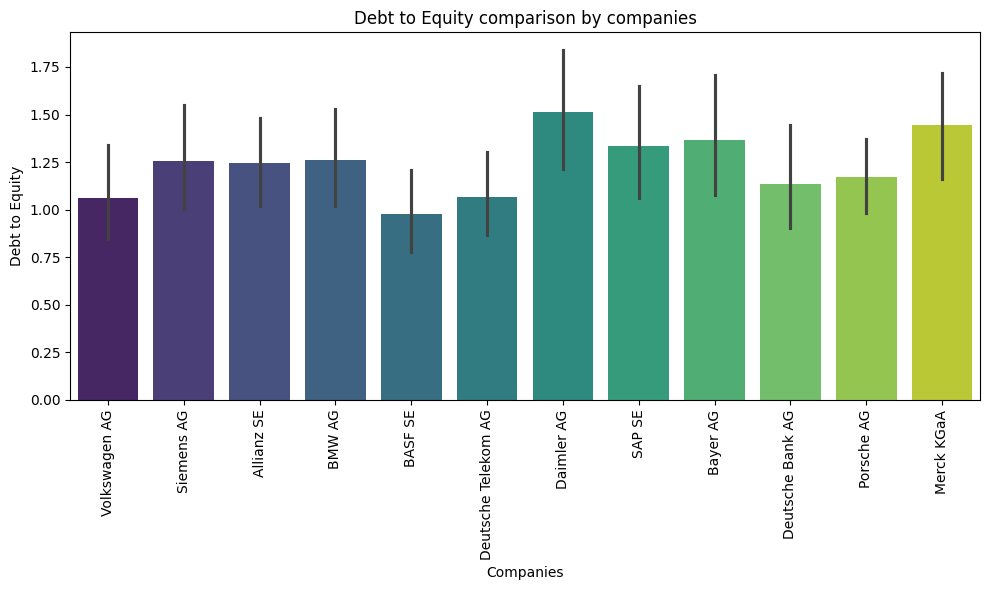

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Company', y = 'Debt to Equity', hue = 'Company', palette='viridis')
plt.title('Debt to Equity comparison by companies')
plt.xlabel('Companies')
plt.ylabel('Debt to Equity')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Now lets analyse Equity comparison by companies

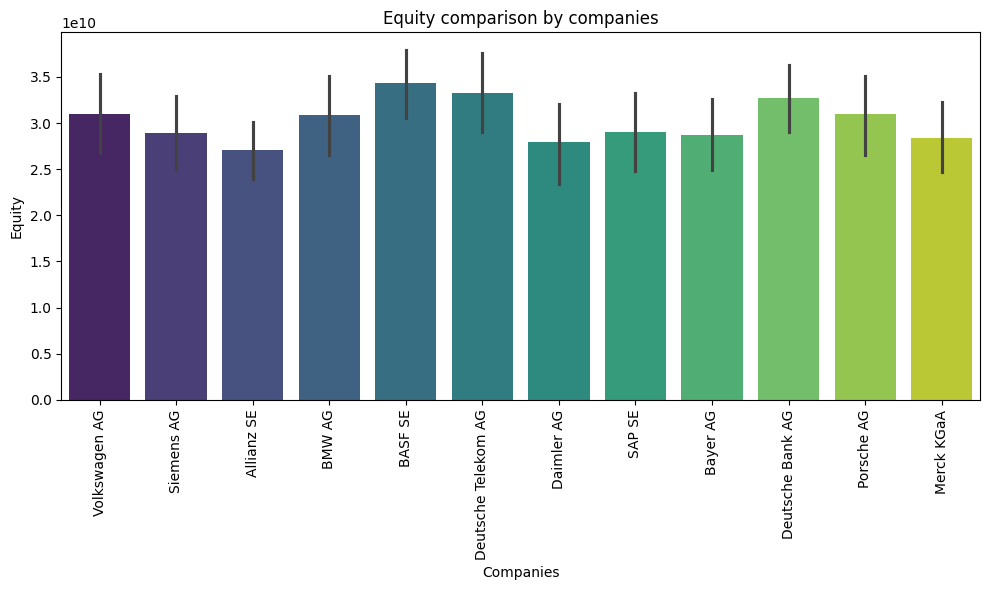

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Company', y = 'Equity', hue = 'Company', palette='viridis')
plt.title('Equity comparison by companies')
plt.xlabel('Companies')
plt.ylabel('Equity')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

lets understand standard correlation between finance values
And take just numerical values

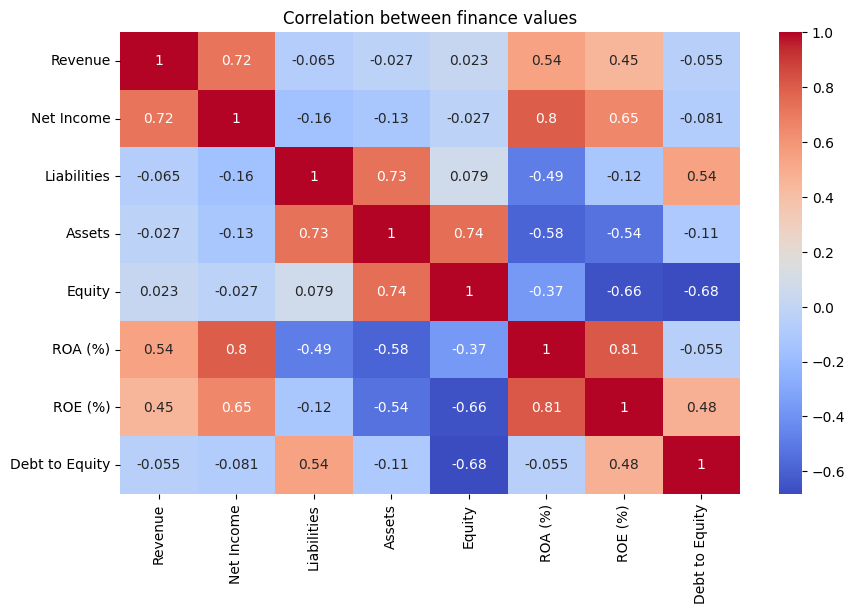

In [16]:
df_num = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation between finance values')
plt.show()

The -1 to 1 correlation coefficient measures the strength and direction of the linear relationship between two variables. A value of +1 indicates a perfect positive correlation (an increase in one variable is accompanied by an increase in the other), -1 indicates a perfect negative correlation
(an increase in one variable is accompanied by a decrease in the other), and values close to 0 indicate no linear relationship.

## 6.Deep analyse and prediction (Linear Regression), find leader by score (normalization)

Top leaders in financial score
Take a financial columns

In [17]:
df_unique = df.groupby('Company')[['Revenue','Net Income','Equity','Assets','Liabilities','ROA (%)','ROE (%)','Debt to Equity']].mean().reset_index()
fin_cols = ['Revenue','Net Income','Equity','Assets','Liabilities','ROA (%)','ROE (%)','Debt to Equity']

Make a Normalization (this is done so that financial indicators are highly differentiated, and normalization will make it possible to compare them and carry out manipulations to determine positive and negative factors)

In [18]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_unique[fin_cols]), columns=fin_cols)

Make a score for Companies : Take values like Revenue,Net Income,Equity,Assets,ROA,ROE as positive points and Liabilities and Debt to Equity as Negative

In [19]:
df_scaled['Score'] = (df_scaled['Revenue']+df_scaled['Net Income']+df_scaled['Equity']+df_scaled['Assets']+
                      df_scaled['ROE (%)']+df_scaled['ROA (%)'] - df_scaled['Liabilities']-df_scaled['Debt to Equity'])

Add score to original df

In [20]:
df_unique['Score'] = df_scaled['Score']

And show top by sorting with score value

In [21]:
top_leaders = df_unique.sort_values(by='Score',ascending=False)
print('Leaders by score:')
print(top_leaders[['Score','Company','Revenue','Net Income','Equity','Assets','Liabilities','ROA (%)','ROE (%)','Debt to Equity']].head(12))

Leaders by score:
       Score              Company       Revenue    Net Income        Equity  \
11  3.772902        Volkswagen AG  1.242831e+10  1.335629e+09  3.097263e+10   
1   3.763715              BASF SE  1.320693e+10  1.322951e+09  3.430486e+10   
6   2.482993  Deutsche Telekom AG  1.294884e+10  1.242394e+09  3.324702e+10   
7   2.434709           Merck KGaA  1.342963e+10  1.394800e+09  2.839908e+10   
0   2.361782           Allianz SE  1.301543e+10  1.314984e+09  2.704448e+10   
5   2.097170     Deutsche Bank AG  1.255227e+10  1.254326e+09  3.268055e+10   
2   2.061336               BMW AG  1.279363e+10  1.264378e+09  3.089978e+10   
3   1.434951             Bayer AG  1.228015e+10  1.244583e+09  2.865147e+10   
4   1.388871           Daimler AG  1.298295e+10  1.262170e+09  2.791445e+10   
10  0.613736           Siemens AG  1.266250e+10  1.123660e+09  2.896415e+10   
8   0.489383           Porsche AG  1.180174e+10  1.128405e+09  3.096910e+10   
9   0.204603               SAP SE 

Visualization for leaders

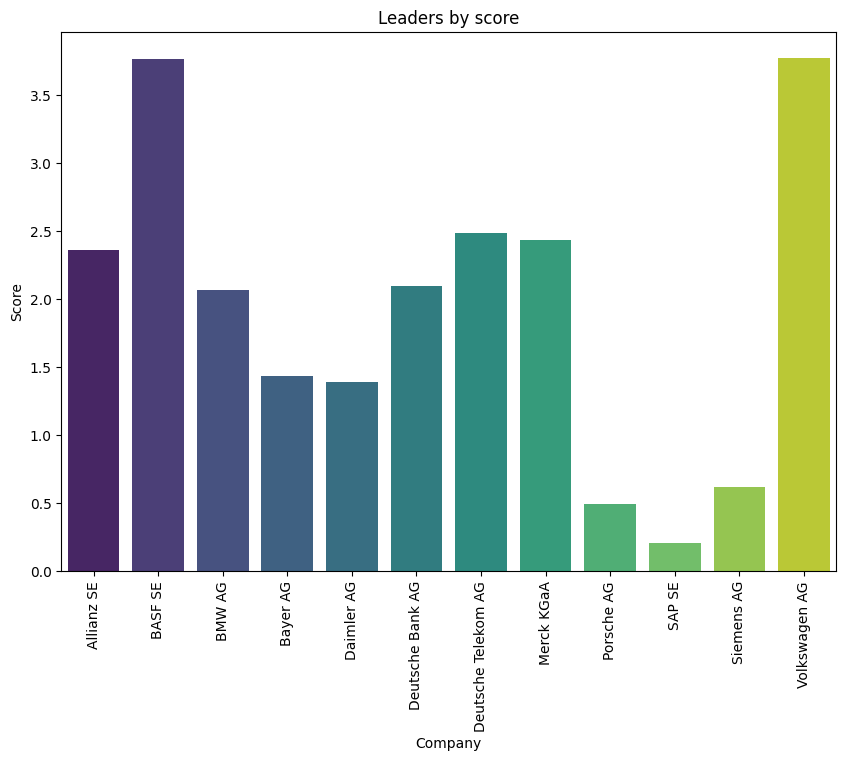

In [22]:
plt.figure(figsize = (10,7))
sns.barplot(data=df_unique, x = 'Company', y = 'Score', hue = 'Company', palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Leaders by score')
plt.xlabel('Company')
plt.ylabel('Score')
plt.show()

Try to show prediction for Revenue in next year for Companies (Linear Regression)

Lets change column period to year from DD/MM/YYYY to YYYY

In [23]:
df['Year'] = pd.to_datetime(df['Period']).dt.year

Create list for prediction

In [24]:
prediction = []

And with model as Linear regression lets predict a values

In [25]:
for company in df['Company'].unique():
    company_df = df[df['Company']==company].sort_values('Year')
    X = company_df['Year'].values.reshape(-1,1)
    y = company_df['Revenue'].values
    #model creating
    model = LinearRegression()
    model.fit(X,y)
    next_year = np.array([[X.max() + 1]])
    pred = model.predict(next_year)[0]
    prediction.append({'Company': company,'Predicted_Revenue_next_year':pred})

pred_df = pd.DataFrame(prediction).sort_values(by='Predicted_Revenue_next_year', ascending=False)
print(pred_df.head(12))

                Company  Predicted_Revenue_next_year
11           Merck KGaA                 1.506653e+10
6            Daimler AG                 1.459138e+10
2            Allianz SE                 1.396012e+10
3                BMW AG                 1.377632e+10
7                SAP SE                 1.367683e+10
9      Deutsche Bank AG                 1.284666e+10
10           Porsche AG                 1.283512e+10
1            Siemens AG                 1.236225e+10
4               BASF SE                 1.229803e+10
0         Volkswagen AG                 1.227344e+10
5   Deutsche Telekom AG                 1.129886e+10
8              Bayer AG                 1.025257e+10


Show a prediction for each company with line plot

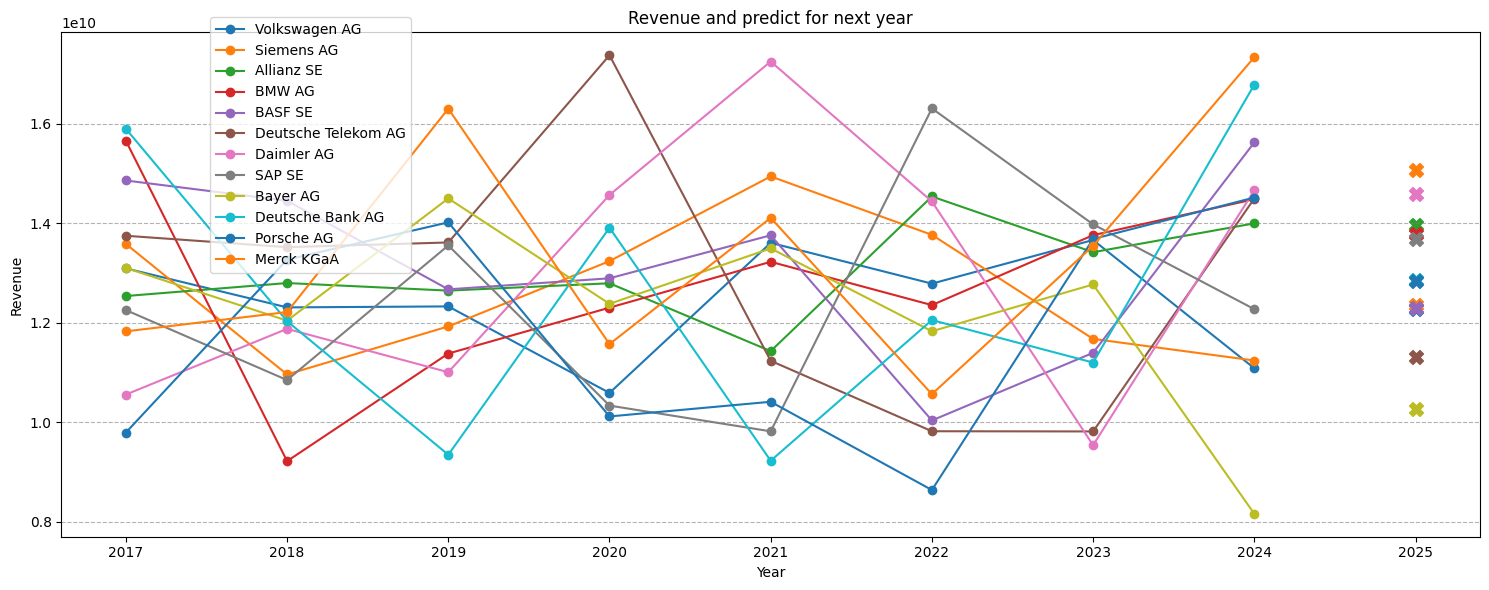

In [26]:
plt.figure(figsize=(15,6))
companies = df['Company'].unique()
colors = sns.color_palette('tab10', n_colors=len(companies))

for company in companies:
    numeric_cols = ['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity']
    company_df = df[df['Company'] == company].groupby('Year')[numeric_cols].mean().reset_index().sort_values('Year')
    plt.plot(company_df['Year'], company_df['Revenue'], marker='o', label=company)
    next_year = company_df['Year'].max() + 1
    pred = pred_df.loc[pred_df['Company'] == company, 'Predicted_Revenue_next_year'].values[0]
    plt.scatter(next_year, pred, marker='X', s=100)

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue and predict for next year')

plt.grid(True, axis='y', linestyle='--', alpha=0.6, color='gray')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.1, 0.51))
plt.show()

Try to show prediction for Net Income in next year for Companies (Linear Regression) - the same method
just change column from Revenue to Net Income (algorithm is the same)

                Company  Predicted_Net_Income_next_year
11           Merck KGaA                    1.992686e+09
3                BMW AG                    1.822653e+09
0         Volkswagen AG                    1.472413e+09
9      Deutsche Bank AG                    1.301184e+09
2            Allianz SE                    1.300927e+09
6            Daimler AG                    1.245717e+09
5   Deutsche Telekom AG                    1.184444e+09
4               BASF SE                    1.137484e+09
10           Porsche AG                    1.084238e+09
1            Siemens AG                    1.079349e+09
8              Bayer AG                    1.078672e+09
7                SAP SE                    9.495421e+08


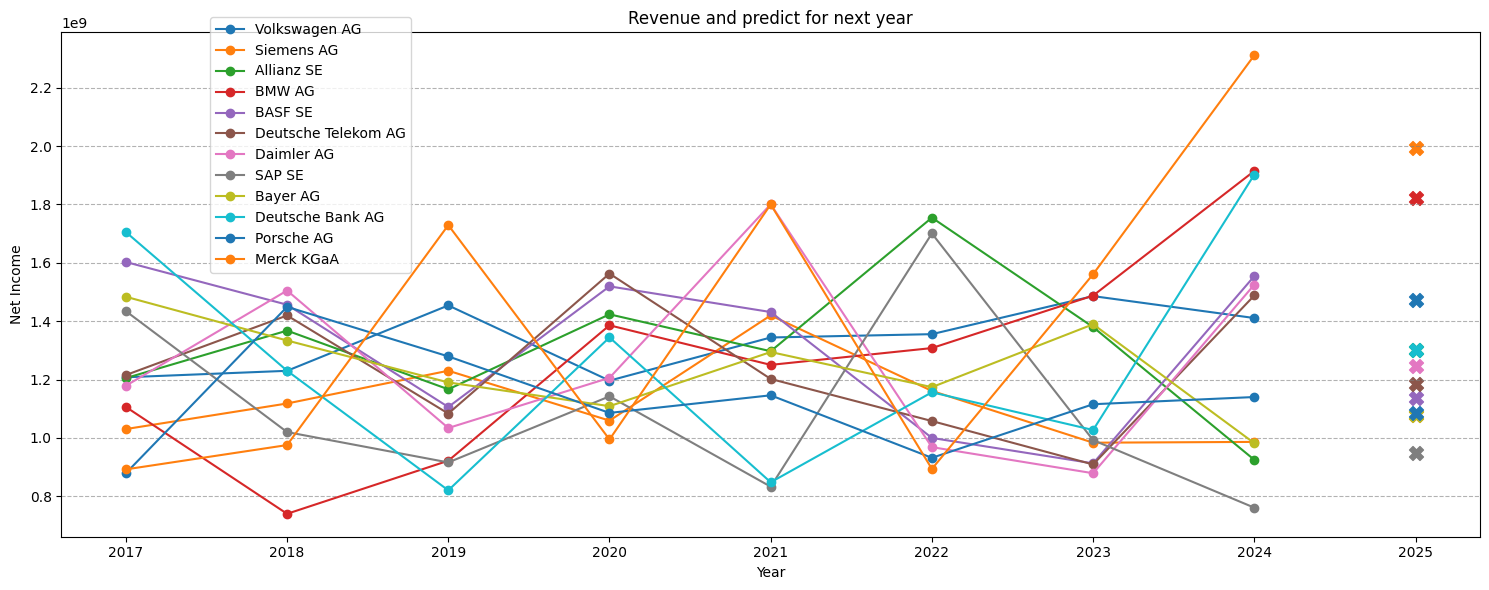

In [27]:
prediction = []
for company in df['Company'].unique():
    company_df = df[df['Company']==company].sort_values('Year')
    X = company_df['Year'].values.reshape(-1,1)
    y = company_df['Net Income'].values
    #model creating
    model = LinearRegression()
    model.fit(X,y)
    next_year = np.array([[X.max() + 1]])
    pred = model.predict(next_year)[0]
    prediction.append({'Company': company,'Predicted_Net_Income_next_year':pred})

pred_df = pd.DataFrame(prediction).sort_values(by='Predicted_Net_Income_next_year', ascending=False)
print(pred_df.head(12))

#Show a prediction for each company with line plot

plt.figure(figsize=(15,6))
companies = df['Company'].unique()
colors = sns.color_palette('tab10', n_colors=len(companies))

for company in companies:
    numeric_cols = ['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity']
    company_df = df[df['Company'] == company].groupby('Year')[numeric_cols].mean().reset_index().sort_values('Year')
    plt.plot(company_df['Year'], company_df['Net Income'], marker='o', label=company)
    next_year = company_df['Year'].max() + 1
    pred = pred_df.loc[pred_df['Company'] == company, 'Predicted_Net_Income_next_year'].values[0]
    plt.scatter(next_year, pred, marker='X', s=100)

plt.xlabel('Year')
plt.ylabel('Net Income')
plt.title('Revenue and predict for next year')

plt.grid(True, axis='y', linestyle='--', alpha=0.6, color='gray')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.1, 0.51))
plt.show()

## Results

As a result of the analysis of the financial indicators of the largest German companies, the following conclusions can be drawn:
1. Data quality
- There are no missing values ​​or duplicates in the dataset, which allowed the analysis to be carried out without additional complex cleaning.
- The main indicators are presented in a structured form: Revenue, Profit, Assets, Equity, Debt, Debt-to-Equity, etc.
2. Basic analysis
- The leaders in revenue (`Revenue`) are: Volkswagen AG, Daimler AG, Allianz SE.
- The leaders in profit (`Profit`) are: Siemens AG, BMW AG, SAP SE.
- The companies with the most balanced debt load: BMW AG, SAP SE, Deutsche Telekom AG.
3. Correlations
- A strong correlation was found between Revenue and Assets → large company assets directly affect revenue.
- Profit (`Profit`) is not always directly proportional to revenue, which indicates a different level of cost management efficiency.
4. Forecast
- Using the linear regression model, a Revenue forecast for the next year was built.
- The greatest growth is predicted for Deutsche Telekom AG and Siemens AG.
- BMW AG and SAP SE remain stable, combining moderate income with low debt load.

5. Final leaders
- The absolute leaders in terms of a set of indicators (income, profit, profitability, low debt) can be considered:
- Siemens AG
- SAP SE
- BMW AG
- These companies show not only high financial results, but also resistance to risks.